# IITM - MLP - Week 2

## Imports

In [257]:
# ---------- Common ------------
import os
import time
import json
import random
import ast
from datetime import datetime
from collections import Counter

# ---------- Data Manipulation ------------
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
import numpy as np

# ---------- Data Visualization ------------
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)
sns.set_theme(style="whitegrid")

# ---------- Sklearn ------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer

# ---------- Sklearn ML Models ------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# ---------- Sklearn Metrics ------------
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# ---------- Sklearn Abstract ------------
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

from sklearn.decomposition import PCA

from sklearn.feature_extraction import DictVectorizer

from sklearn import set_config
set_config(display='diagram')

# ---------- Sklearn: Filter based ------------
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

# ---------- Sklearn: Wrapper based ------------
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel

# ---------- Sklearn Datasets ------------
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_multilabel_classification

# ---------- Sklearn External Datasets ------------
from sklearn.datasets import fetch_openml

# ---------- Imblearn ------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# ---------- Scipy ------------
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy import stats

# ---------- Extras ------------
import pickle
# pickle.dump(model, open(filename, 'wb'))
# loaded_model = pickle.load(open(filename, 'rb'))

import tempfile

## Common helper functions

In [2]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Std Dev: {scores.std()}')
    return

def multiple_scores(y_true, y_pred):
    Functions = [explained_variance_score, max_error, mean_absolute_error, 
                 mean_squared_error, r2_score]
    Names = ("Explained variance score : ", "Max Error : ", "Mean Absolute Error :", "Mean Squared Error: ", "R squared score: ")
    for func,name in zip(Functions, Names):
        print(name, func(y_true, y_pred))

## Get the Data

### Load Data

In [3]:
root_path = r"C:\Users\tusha\Jupyter_notebooks\IITM_Term_5\MLP"
os.listdir(root_path)

['.ipynb_checkpoints',
 'MLP_Week_1.ipynb',
 'MLP_Week_2.ipynb',
 'MLP_Week_3.ipynb',
 'MLP_Week_4.ipynb',
 'winequality-red.csv']

In [4]:
# data_url = "https://.........."
# df = pd.read_csv(data_url, sep=",") # to download data from web

data_path = os.path.join(root_path, 'winequality-red.csv')
df = pd.read_csv(data_path)
print(f"Data Shape: {df.shape}")

Data Shape: (1599, 12)


In [5]:
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Preprocessing -- Feature : Extraction, Cleaning, Scaling, Transformation, Visualization, Selection 

## Feature Extraction

### DictVectorizer

In [6]:
# Convert list of dict objects to feature matrix
# fit: learns relevant parms for transformation
# transform: carries out transformation 

In [7]:
data = [{"age":15, "height":130},
       {"age":17, "height":145},
       {"age":18, "height":160}]

dv = DictVectorizer(sparse=False)
data_tr = dv.fit_transform(data)

data_tr

array([[ 15., 130.],
       [ 17., 145.],
       [ 18., 160.]])

## Data Cleaning: Imputation

### SimpleImputer

In [8]:
# Fill missing values with mean/median/most_frequent/constant
# Missing value types: int, float, str, np.nan, None
# add_indicator: when True returns missing value indicators in indicator_ variable

#### Load Data

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cols = ["age" ,"sex" ,"cp" ,"trestbps" ,"chol" ,"fbs" ,"restecg" ,"thalach" ,"exang" ,"oldpeak" ,"slope" ,"ca" ,"thal" ,"num"]

heart_df = pd.read_csv(url, header=None, names=cols)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
# age: age in years
# sex: sex (1 = male; 0 = female)
# cp: chest pain type
#     -- Value 1: typical angina
#     -- Value 2: atypical angina
#     -- Value 3: non-anginal pain
#     -- Value 4: asymptomatic
# trestbps: resting blood pressure (in mm Hg on admission to the hospital)
# chol: serum cholestoral in mg/dl
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# restecg: resting electrocardiographic results
#     -- Value 0: normal
#     -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#     -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
# thalach: maximum heart rate achieved
# exang: exercise induced angina (1 = yes; 0 = no)
# oldpeak = ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment
#     -- Value 1: upsloping
#     -- Value 2: flat
#     -- Value 3: downsloping
# ca: number of major vessels (0-3) colored by flourosopy
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# num: diagnosis of heart disease (angiographic disease status)
#     -- Value 0: < 50% diameter narrowing
#     -- Value 1: > 50% diameter narrowing

#### Find missing values

In [11]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [12]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [13]:
categorical_feat = ["ca", "thal"]

In [14]:
for feat in categorical_feat:
    print(f"Unique values in {feat}: {heart_df[feat].unique()}")

Unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal: ['6.0' '3.0' '7.0' '?']


In [15]:
missing_val_types = ["?"]
for feat in categorical_feat:
    for m_type in missing_val_types:
        print(f"# missing values in {feat} of type {m_type}: {heart_df.loc[heart_df[feat] == m_type, feat].count()}")

# missing values in ca of type ?: 4
# missing values in thal of type ?: 2


#### Replace missing values or dummy values with np.nan

In [16]:
heart_df.replace("?", np.nan, inplace=True)

#### Use SimpleImputer without indicators

In [17]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=False)
heart_df_imputed = imputer.fit_transform(heart_df) # returns numpy array
print(f"Shape: {heart_df_imputed.shape}")

Shape: (303, 14)


In [18]:
df = heart_df.copy(deep=True)

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=False)
df[["ca", "thal"]] = imputer.fit_transform(df[["ca", "thal"]]) # to replace values in dataframe
print(f"Shape: {df.shape}")
df.head(2)

Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


#### Use SimpleImputer with indicators

In [20]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=True)
heart_df_imputed = imputer.fit_transform(heart_df) # returns numpy array
print(f"Shape: {heart_df_imputed.shape}")

Shape: (303, 16)


In [21]:
df = heart_df.copy(deep=True)

In [22]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=True)
df[["ca", "thal", "ca_ind", "thal_ind"]] = imputer.fit_transform(df[["ca", "thal"]]) # to replace values in dataframe
print(f"Shape: {df.shape}")
df.head(2)

Shape: (303, 16)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,ca_ind,thal_ind
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,0.0,0.0


#### Use SimpleImputer with constant strategy

In [23]:
imputer = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=0)

## Feature Scaling

In [24]:
# All features on same scale
# Enables faster convergence
# Distance based algo: Sensitive to scales -- SVM, K-means, KNN : Feature scaling is must for these
# Tree based are not sensitive

### Load Data

In [25]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
cols = ["Sex" ,"Length" ,"Diameter" ,"Height" ,"Whole weight" ,"Shucked weight" ,"Viscera weight" ,"Shell weight" ,"Rings"]

abalone_df = pd.read_csv(url, header=None, names=cols)
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [26]:
# Name / Data Type / Measurement Unit / Description
# -----------------------------
# Sex / nominal / -- / M, F, and I (infant)
# Length / continuous / mm / Longest shell measurement
# Diameter / continuous / mm / perpendicular to length
# Height / continuous / mm / with meat in shell
# Whole weight / continuous / grams / whole abalone
# Shucked weight / continuous / grams / weight of meat
# Viscera weight / continuous / grams / gut weight (after bleeding)
# Shell weight / continuous / grams / after being dried
# Rings / integer / -- / +1.5 gives the age in years


#### Find missing values

In [27]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [28]:
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [29]:
# Sex is categorical.
# Convert it to numbers using enecoders

In [30]:
abalone_df.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [31]:
abalone_df = abalone_df.replace({"Sex": {"M":1, "F":2, "I":3}})

### Seperate labels

In [32]:
# Feature scaling is not performed on labels
# So separate labels

In [33]:
y = abalone_df.pop("Rings")
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


### Examine Scales

#### Statistical method

In [35]:
abalone_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


#### Visualize Scales

##### Feature Histogram

##### Single Feature

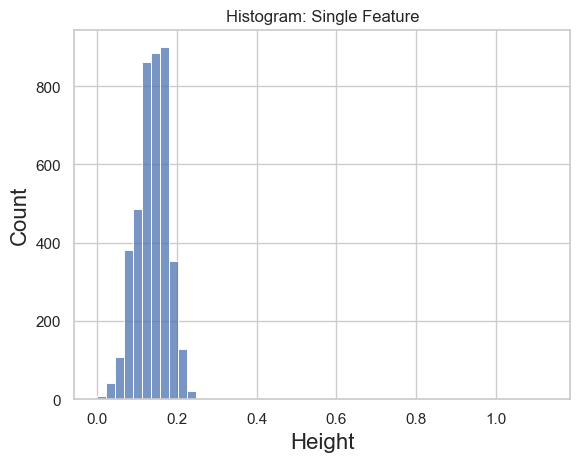

In [36]:
col = "Height"
scale_range = abalone_df[col].max() - abalone_df[col].min()
bins = 10
sns.histplot(data=abalone_df, x=col, bins=bins, binwidth=scale_range/50)
plt.xlabel(col, fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Histogram: Single Feature")
plt.show()

##### Single Feature with KDE and Hue

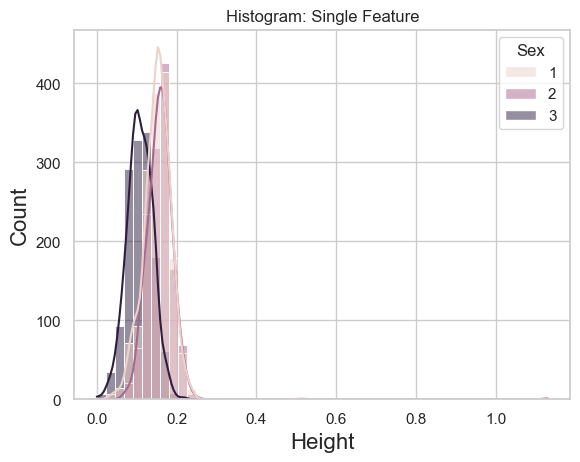

In [37]:
col = "Height"
scale_range = abalone_df[col].max() - abalone_df[col].min()
bins = 10
sns.histplot(data=abalone_df, x=col, bins=bins, binwidth=scale_range/50, kde=True, hue="Sex")
plt.xlabel(col, fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Histogram: Single Feature")
plt.show()

##### All Features

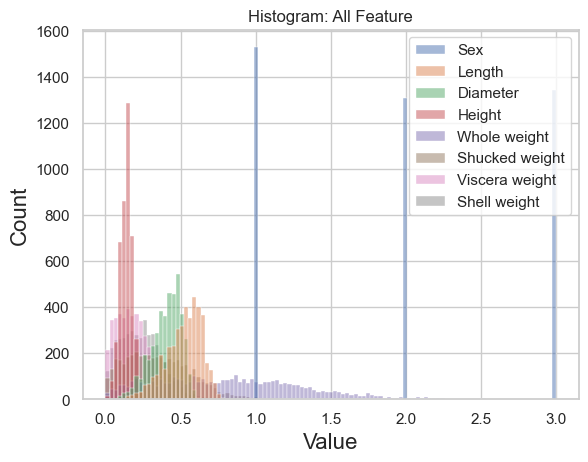

In [38]:
sns.histplot(data=abalone_df)
plt.xlabel("Value", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Histogram: All Feature")
plt.show()

##### All Features but with pandas

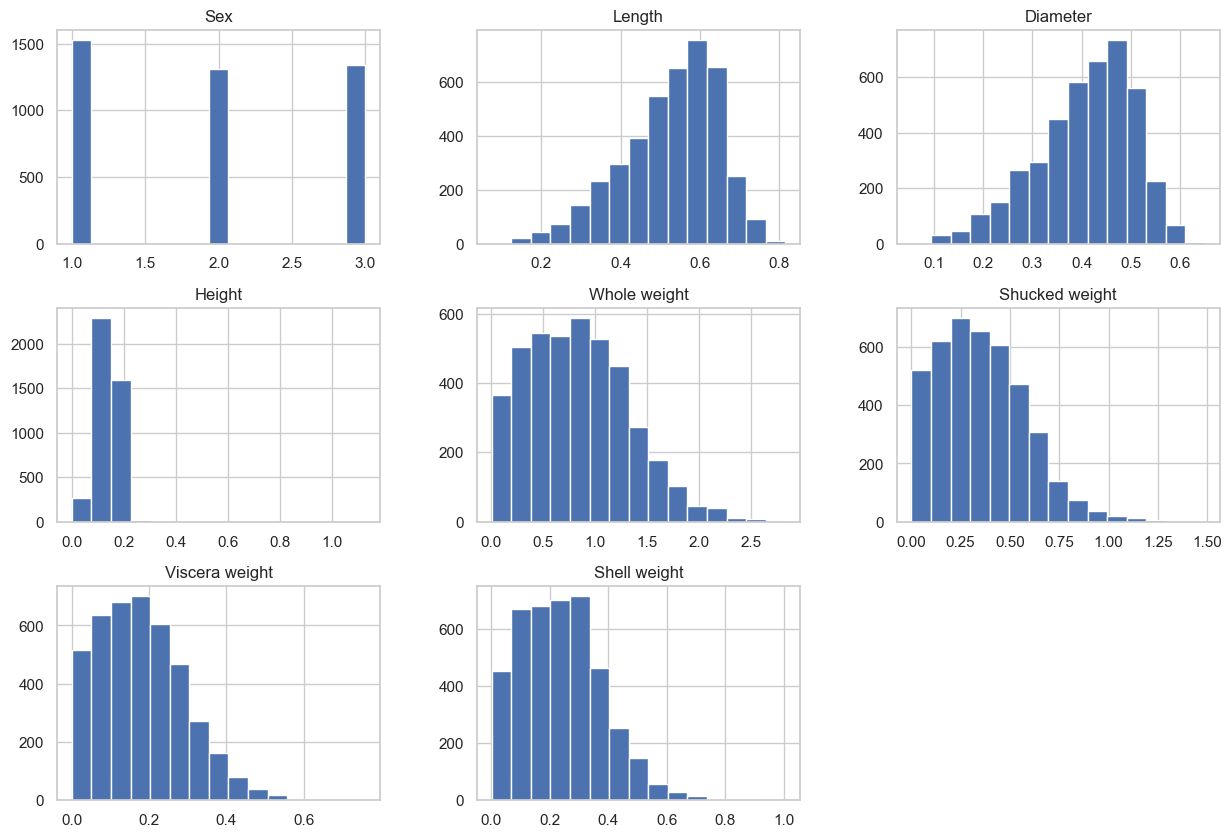

In [39]:
abalone_df.hist(bins=15, figsize=(15, 10))
plt.show()

##### Feature KDE

In [51]:
# Kernel density estimation plot

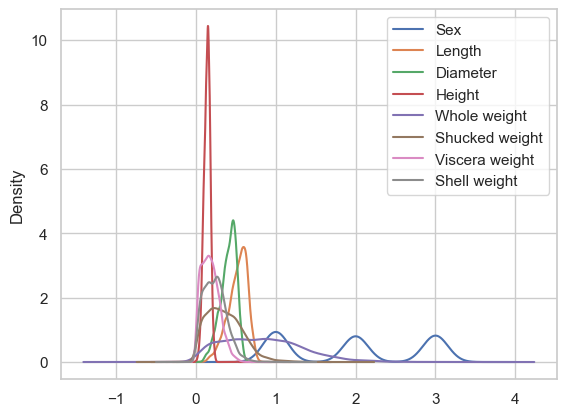

In [42]:
abalone_df.plot.kde()
plt.show()

In [43]:
# its visible that all features are on different scales

##### Box plot

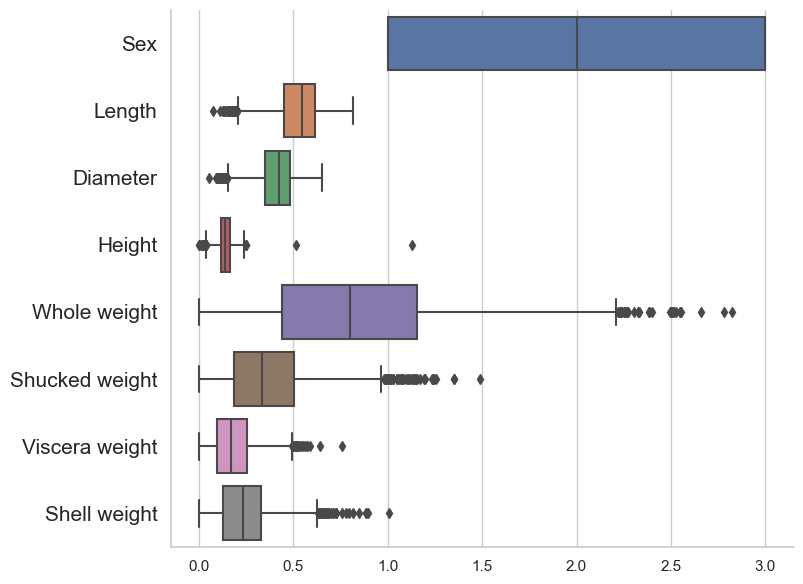

In [68]:
p = sns.catplot(data=abalone_df, orient="h", kind="box", height=6, aspect=1.3)
p.set_yticklabels(size = 15)
plt.show()

##### Violin plot

In [69]:
# based on KDE of underlying distribution

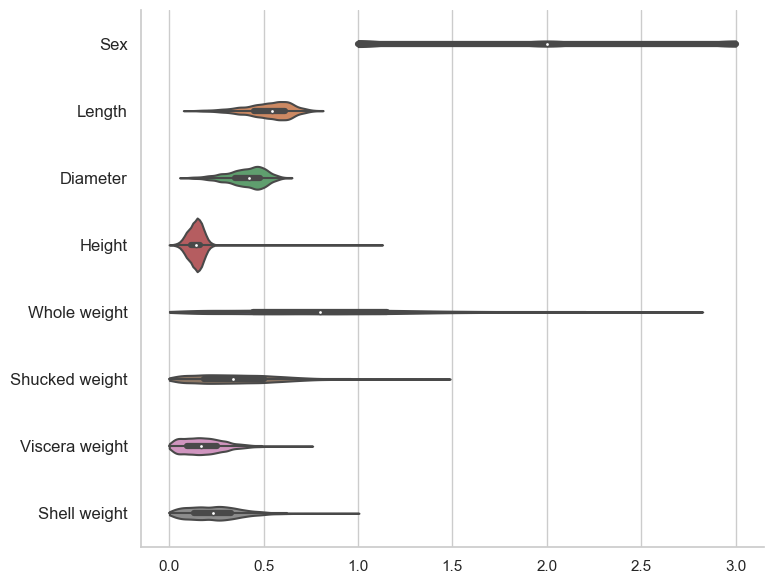

In [82]:
p = sns.catplot(kind="violin", data=abalone_df, bw=.15, cut=0, orient="h", height=6, aspect=1.3)
p.set_yticklabels(size = 12)
plt.show()

##### Boxen plot

In [83]:
# violin plot is difficult, so use boxen 

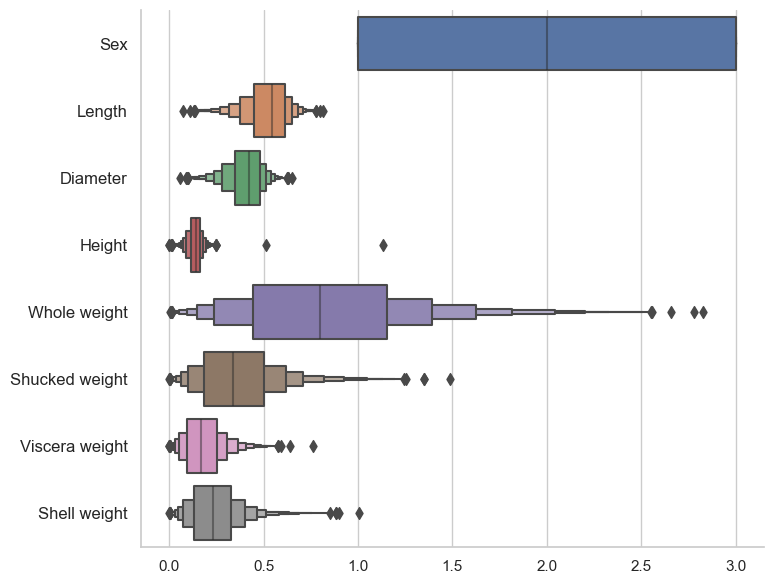

In [84]:
p = sns.catplot(kind="boxen", data=abalone_df, orient="h", height=6, aspect=1.3)
p.set_yticklabels(size = 12)
plt.show()

## Numeric Transformers

### Features Scaling

#### MaxAbsoluteScaler

In [85]:
# New data range: [-1, 1]

In [86]:
x = np.array([4, 2, 5, -2, -100])
print(f"Shape: {x.shape}")
x = x.reshape(-1,1)
print(f"Shape: {x.shape}\n{x}")

Shape: (5,)
Shape: (5, 1)
[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


In [88]:
mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.02]
 [-1.  ]]


#### MinMaxScaler

In [89]:
# New data range: [0, 1]

In [90]:
x = np.array([4, 2, 5, -2, -100])
print(f"Shape: {x.shape}")
x = x.reshape(-1,1)
print(f"Shape: {x.shape}\n{x}")

Shape: (5,)
Shape: (5, 1)
[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


In [91]:
mms = MinMaxScaler()
x_new = mms.fit_transform(x)
print(x_new)

[[0.99047619]
 [0.97142857]
 [1.        ]
 [0.93333333]
 [0.        ]]


#### MinMaxScaler on real data

In [93]:
abalone_norm_df = abalone_df.copy(deep=True)
mms = MinMaxScaler()
abalone_norm_df.iloc[:,:] = mms.fit_transform(abalone_df)
abalone_norm_df.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982
1,0.0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261


In [95]:
abalone_norm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,0.477735,0.413907,0.0,0.000000,0.500000,1.000000,1.0
Length,4177.0,0.606746,0.162288,0.0,0.506757,0.635135,0.729730,1.0
Diameter,4177.0,0.593078,0.166790,0.0,0.495798,0.621849,0.714286,1.0
Height,4177.0,0.123466,0.037015,0.0,0.101770,0.123894,0.146018,1.0
Whole weight,4177.0,0.292808,0.173681,0.0,0.155658,0.282451,0.407650,1.0
Shucked weight,4177.0,0.241000,0.149269,0.0,0.124412,0.225286,0.336920,1.0
Viscera weight,4177.0,0.237121,0.144324,0.0,0.122449,0.224490,0.332456,1.0
Shell weight,4177.0,0.236503,0.138717,0.0,0.128052,0.231689,0.326358,1.0


#### Visualize Scales after Scaling

##### All Features

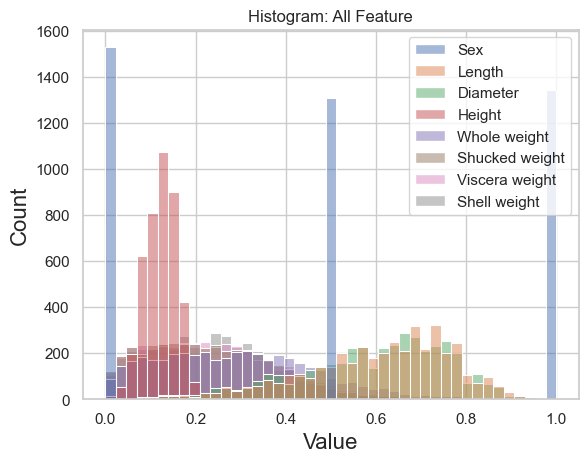

In [97]:
sns.histplot(data=abalone_norm_df)
plt.xlabel("Value", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Histogram: All Feature")
plt.show()

##### Feature KDE

In [51]:
# Kernel density estimation plot

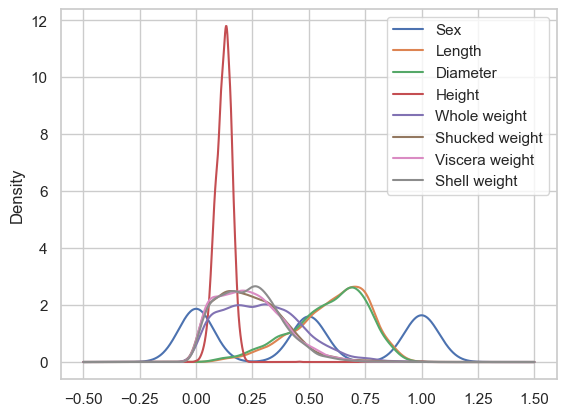

In [98]:
abalone_norm_df.plot.kde()
plt.show()

##### Boxen plot

In [83]:
# violin plot is difficult, so use boxen 

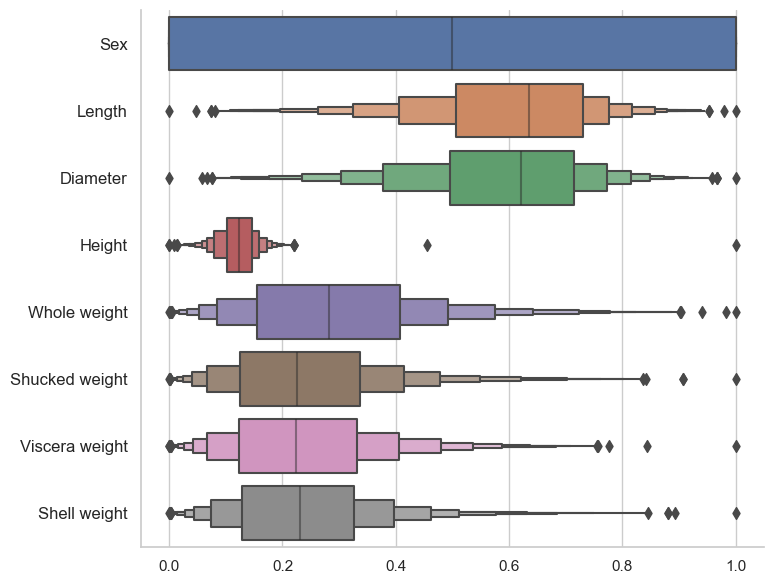

In [99]:
p = sns.catplot(kind="boxen", data=abalone_norm_df, orient="h", height=6, aspect=1.3)
p.set_yticklabels(size = 12)
plt.show()

#### StandardScaler

In [100]:
# New data range: range is not fixed but mean=0, std=1

In [101]:
x = np.array([4, 2, 5, -2, -100])
print(f"Shape: {x.shape}")
x = x.reshape(-1,1)
print(f"Shape: {x.shape}\n{x}")

Shape: (5,)
Shape: (5, 1)
[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


In [102]:
ss = StandardScaler()
x_new = ss.fit_transform(x)
print(x_new)

[[ 0.54185681]
 [ 0.49304089]
 [ 0.56626478]
 [ 0.39540903]
 [-1.99657151]]


#### StandardScaler on real data

In [103]:
abalone_std_df = abalone_df.copy(deep=True)
ss = StandardScaler()
abalone_std_df.iloc[:,:] = ss.fit_transform(abalone_df)
abalone_std_df.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-1.154346,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.154346,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987


In [104]:
abalone_std_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,-7.593745e-16,1.00012,-1.154346,-1.154346,0.053798,1.261943,1.261943
Length,4177.0,-6.651770e-16,1.00012,-3.739154,-0.616198,0.174951,0.757903,2.423480
Diameter,4177.0,-3.957146e-16,1.00012,-3.556267,-0.583316,0.172519,0.726798,2.440025
Height,4177.0,5.082520e-16,1.00012,-3.335953,-0.586208,0.011563,0.609334,23.683287
Whole weight,4177.0,1.466122e-16,1.00012,-1.686092,-0.789758,-0.059638,0.661305,4.072271
Shucked weight,4177.0,-4.582295e-17,1.00012,-1.614731,-0.781159,-0.105289,0.642673,5.085388
Viscera weight,4177.0,1.085504e-16,1.00012,-1.643173,-0.794642,-0.087532,0.660635,5.286500
Shell weight,4177.0,3.648825e-16,1.00012,-1.705134,-0.781909,-0.034708,0.647832,5.504642


#### Visualize Scales after Scaling

##### All Features

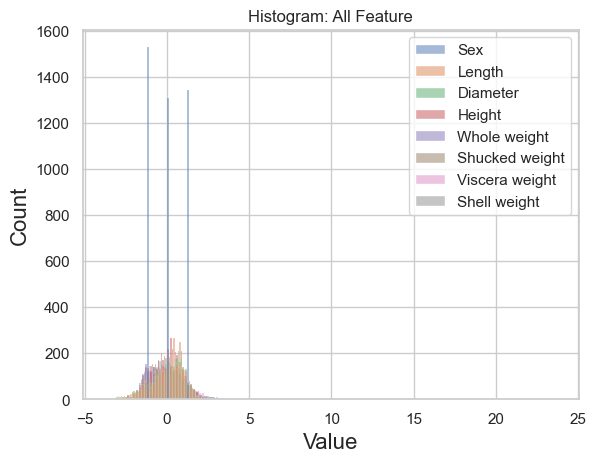

In [105]:
sns.histplot(data=abalone_std_df)
plt.xlabel("Value", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Histogram: All Feature")
plt.show()

##### Feature KDE

In [51]:
# Kernel density estimation plot

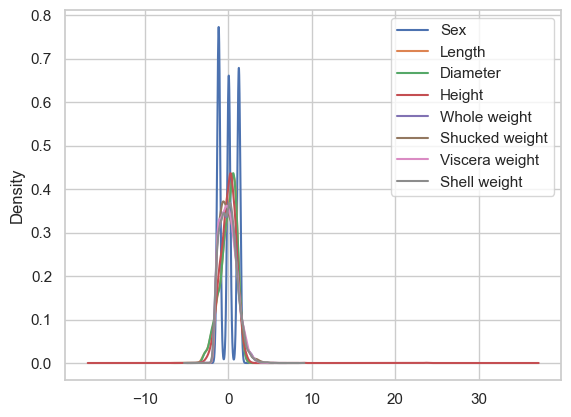

In [106]:
abalone_std_df.plot.kde()
plt.show()

##### Boxen plot

In [83]:
# violin plot is difficult, so use boxen 

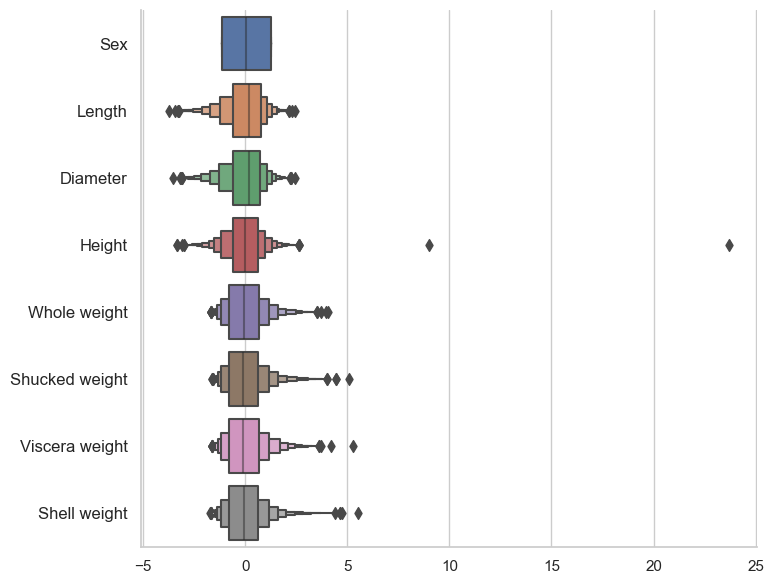

In [107]:
p = sns.catplot(kind="boxen", data=abalone_std_df, orient="h", height=6, aspect=1.3)
p.set_yticklabels(size = 12)
plt.show()

In [108]:
# Its visible that standardied data has 50% quartile line at 0
# also, height column contains 2 to 3 outlier points
# Its better to remove outliers is required

In [109]:
# https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [ ]:
# from scipy import stats

# def drop_numerical_outliers(df, z_thresh=3):
#     # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
#     constrains = df.select_dtypes(include=[np.number]) \
#         .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, result_type="reduce") \
#         .all(axis=1)
#     # Drop (inplace) values set to be rejected
#     df.drop(df.index[~constrains], inplace=True)

### Add dummy feature

In [114]:
x = np.array([[2,5],[7,6]])
print("Old:\n", x)

x_new = add_dummy_feature(x)
print("New:\n", x_new)

Old:
 [[2 5]
 [7 6]]
New:
 [[1. 2. 5.]
 [1. 7. 6.]]


### Column Transformer for mixed features

In [115]:
# # Dummy code as we dont have categorical features in our df now

# numerical_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy="median")),
#     ('std_scalar', StandardScaler())])

# numerical_attrs = list(wine_features)
# categorical_attrs = ['dummy_cat_feat']

# full_pipeline = ColumnTransformer([
#     ("numerical", numerical_pipeline, numerical_attrs),
#     ("categorical", OneHotEncoder(), categorical_attrs)])
    
# wine_features_transformed = full_pipeline.fit_transform(wine_features)

### Custom Transformer

#### Load data

In [110]:
data_path = os.path.join(root_path, 'winequality-red.csv')
df = pd.read_csv(data_path)
print(f"Data Shape: {df.shape}")

Data Shape: (1599, 12)


In [116]:
# use custom defined functions as a transformer
# For heterogenous data set (img, text caption)

In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [119]:
# log1p returns natural log of (1 + feat_val)

transformer = FunctionTransformer(np.log1p, validate=True)
df_transformed = transformer.transform(np.array(df))
pd.DataFrame(df_transformed, columns=df.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


### Polynomial Features

In [121]:
df_train = df.drop(['quality'], axis=1)
print(f"Shape: {df_train.shape}")

poly = PolynomialFeatures(degree=2)
df_train_poly = poly.fit_transform(df_train)
print(f"Shape: {df_train_poly.shape}")

Shape: (1599, 11)
Shape: (1599, 78)


In [122]:
poly.feature_names_in_

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [125]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

### Discretization

In [126]:
# Known as quantization or binning. 
# Used to partition continuous feature into discrete values 
# Convert continuous attribute column to only nominal attr col
# onehot models are expensive but interpretable
# Discretization introduces nonlinearity to linear model.

#### KBinsDiscretizer

##### KBD Ordinal

In [133]:
x = np.array([0,2.3,4.5,8.3,9.1]).reshape(-1,1)
print(f"Old:\n{x}")

kbd_enc = KBinsDiscretizer(n_bins=3, encode="ordinal")
x_new = kbd_enc.fit_transform(x)
print(f"New:\n{x_new}")

Old:
[[0. ]
 [2.3]
 [4.5]
 [8.3]
 [9.1]]
New:
[[0.]
 [0.]
 [1.]
 [2.]
 [2.]]


##### KBD Onehot

In [139]:
x = np.array([0,2.3,4.5,8.3,9.1]).reshape(-1,1)
print(f"Old:\n{x}")

kbd_enc = KBinsDiscretizer(n_bins=3, encode="onehot")
x_new = kbd_enc.fit_transform(x)
print(f"New:\n{x_new.toarray()}")

Old:
[[0. ]
 [2.3]
 [4.5]
 [8.3]
 [9.1]]
New:
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [140]:
# no of cols = no of bins
# each col will contain 0 or 1 
# return is sparse matrix but can be converted to full np array

## Categorical Transformers

### Feature Encoding

#### One Hot Encoding

In [143]:
x = np.array(['red', 'blue', 'green', 'blue']).reshape(-1,1)
print(f"Old:\n{x}")

oh_enc = OneHotEncoder()
x_new = oh_enc.fit_transform(x)
print(f"New:\n{x_new.toarray()}")

Old:
[['red']
 ['blue']
 ['green']
 ['blue']]
New:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [144]:
oh_enc.categories_

[array(['blue', 'green', 'red'], dtype='<U5')]

#### Ordinal Encoding

In [141]:
# red:1, blue:2, green:3
# but blue is not twice of red
# this type of encoding sometimes provides wrong info to ML models
# best way is to use one hot encoding.

In [148]:
x = np.array(['red', 'blue', 'green', 'blue']).reshape(-1,1)
print(f"Old:\n{x}")

or_enc = OrdinalEncoder()
x_new = or_enc.fit_transform(x)
print(f"New:\n{x_new}")

Old:
[['red']
 ['blue']
 ['green']
 ['blue']]
New:
[[2.]
 [0.]
 [1.]
 [0.]]


### Label Encoding

#### Label Encoder

In [153]:
# transform categorical features into integer scales
# Only 1D array input
# For label column
# encoding: 0 to k-1 values

x = np.array(['red', 'blue', 'green', 'blue'])
print(f"Old:\n{x}")

l_enc = LabelEncoder()
x_new = l_enc.fit_transform(x)
print(f"New:\n{x_new}")

Old:
['red' 'blue' 'green' 'blue']
New:
[2 0 1 0]


#### Multilabel Binarizer

In [155]:
# transform categorical features into integer scales
# encoding: 0 to k-1 values
# for mulitple labels datasets

movie_genres = [{'action', 'thriller', 'scifi'},
               {'comedy', 'scifi'},
               {'adventure', 'drama'},
               {'action', 'thriller'}]

mlb_enc = MultiLabelBinarizer()
movie_genres_new = mlb_enc.fit_transform(movie_genres)
movie_genres_new

array([[1, 0, 0, 0, 1, 1],
       [0, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1]])

In [156]:
mlb_enc.classes_

array(['action', 'adventure', 'comedy', 'drama', 'scifi', 'thriller'],
      dtype=object)

### Get Dummies from pandas

In [ ]:
# to create one-hot encoding from each unique categorical value

# new_df = pd.get_dummies(df, columns=[''], prefix=['one_hot'])

## Composite Transformers

### Column Transformers

In [157]:
# set of features applied to columns,
# each column may have diff transfromer
# column is specified from column index
# useful for transforming heterogenous data
# Returns single transformer object

In [159]:
x = [[20.0, 'male'],
    [11.0, 'female'],
    [16.0, 'male'],
    [10.0, 'female']]

transformers = [('scaler', MaxAbsScaler(), [0]),
               ('pass', 'passthrough', [0]),
               ('encoder', OneHotEncoder(), [1])]

# by default, columns which are not specified will be dropped

ct = ColumnTransformer(transformers=transformers)
x_new = ct.fit_transform(x)
print(x_new)

[[1.0 20.0 0.0 1.0]
 [0.55 11.0 1.0 0.0]
 [0.8 16.0 0.0 1.0]
 [0.5 10.0 1.0 0.0]]


### Transformed target Regressor

In [160]:
# transforms target variable 'y' before fitting a regression model
# inverse transform predicted values
# takes input as regressor and transformer

In [162]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

line_reg = LinearRegression()
transformer = MaxAbsScaler()

regr = TransformedTargetRegressor(regressor=line_reg, transformer=transformer)

regr.fit(X_train, y_train)
print(f"Score: {regr.score(X_test, y_test)}")

Score: 0.594323265246617


## Feature Selection

In [164]:
# features which are not providing any info for model training can be dropped
# Such features can be selected with two methods

### Filter based methods

In [174]:
# Filter based uses scoring functions
# Scoring functions: Mutual info, chi sq, f-statistics
# chi sq is only for classification
# Other two are for both regression and classification

#### Varience threshold

In [170]:
# Too less varience means data is almost constant and will not help in training model
# Features with variences less than the threshold will be dropped.

data = [{'age': 15, 'height': 130},
         {'age': 17, 'height': 145},
         {'age': 18, 'height': 160}]

dv = DictVectorizer(sparse=False)
data_tr = dv.fit_transform(data) # sparse false: returns data as np array
print(f"Transformed Data:\n{data_tr}")

print(f"Column wise varience: {np.var(data_tr, axis=0)}")

Transformed Data:
[[ 15. 130.]
 [ 17. 145.]
 [ 18. 160.]]
Column wise varience: [  1.55555556 150.        ]


In [172]:
# we want to drop columns with var<10

var_thresh = 10
vt = VarianceThreshold(threshold=var_thresh)
data_tr_new = vt.fit_transform(data_tr) 
print(f"Transformed Data:\n{data_tr_new}")

Transformed Data:
[[130.]
 [145.]
 [160.]]


#### SelectKBest

In [179]:
# Keeps top k highest scoring features , rest are dropped

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

skb = SelectKBest(score_func=mutual_info_regression, k=3) # callable function  as param
X_new = skb.fit_transform(X_train, y_train)

print(f"Shape before: {X_train.shape}")
print(f"Shape after: {X_new.shape}")

Shape before: (16512, 8)
Shape after: (16512, 3)


In [181]:
X_new[:5]

array([[   4.2386,   33.83  , -117.55  ],
       [   4.3898,   37.73  , -122.44  ],
       [   3.9333,   33.83  , -118.    ],
       [   1.4653,   34.01  , -118.26  ],
       [   3.1765,   34.08  , -118.36  ]])

In [183]:
skb.get_feature_names_out()
# 1st, 7th and 8th feature is selected

array(['x0', 'x6', 'x7'], dtype=object)

#### SelectPercentile

In [184]:
# Keeps top <percentile> highest scoring features , rest are dropped

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sp = SelectPercentile(score_func=mutual_info_regression, percentile=30) # callable function  as param
X_new = sp.fit_transform(X_train, y_train)

print(f"Shape before: {X_train.shape}")
print(f"Shape after: {X_new.shape}")

Shape before: (16512, 8)
Shape after: (16512, 3)


In [186]:
sp.get_feature_names_out()
# 1st, 7th and 8th feature is selected

array(['x0', 'x6', 'x7'], dtype=object)

#### GenericUnivariateSelect

In [187]:
# strategy is passed through "mode" param
# mode: k_best, percentile, fpr, fdr, fwe

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gus = GenericUnivariateSelect(score_func=mutual_info_regression, mode="k_best", param=3) # select top 3 feat based on k_best strategy
X_new = gus.fit_transform(X_train, y_train)

print(f"Shape before: {X_train.shape}")
print(f"Shape after: {X_new.shape}")

Shape before: (16512, 8)
Shape after: (16512, 3)


In [188]:
gus.get_feature_names_out()
# 1st, 7th and 8th feature is selected

array(['x0', 'x6', 'x7'], dtype=object)

### Wrapper based methods

In [189]:
# wrapper based uses estimator class

#### Recursive Feature Elimination (RFE)

In [190]:
# fits a model first and then ranks features and removes feat based on "step" param

In [194]:
# strategy is passed through "mode" param
# mode: k_best, percentile, fpr, fdr, fwe

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()

# per iteration 1 least imp feat will be removed. Process continues till 3 feat are left.
rfe_selector = RFE(estimator=lin_reg, n_features_to_select=3, step=1) 
rfe_selector = rfe_selector.fit(X_train, y_train)

print(f"Support array (which feat are selected):\n\t{rfe_selector.support_}")
print(f"Rank of each feature:\n\t{rfe_selector.ranking_}") # rank 1 : best

X_new = rfe_selector.transform(X_train)

print(f"Shape before: {X_train.shape}")
print(f"Shape after: {X_new.shape}")

Support array (which feat are selected):
	[ True False False False False False  True  True]
Rank of each feature:
	[1 4 3 2 6 5 1 1]
Shape before: (16512, 8)
Shape after: (16512, 3)


#### RFE_CV

In [195]:
# same as RFE
# does not require number of feat to select as input
# Runs algo till optimal no of feat are left
# Uses cv to find optimal no of feat

#### Select from model

In [197]:
# fits a model first and select desired no of feat based on certain threshold
# feat imp: coef_, importance_getter, feature_importances

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

sfm = SelectFromModel(estimator=lin_reg, max_features=3, prefit=True)

print(f"Feature importance:\n\t{lin_reg.coef_}")

X_new = sfm.transform(X_train)

print(f"Shape before: {X_train.shape}")
print(f"Shape after: {X_new.shape}")

Feature importance:
	[ 4.33333407e-01  9.29324337e-03 -9.86433739e-02  5.93215487e-01
 -7.56192502e-06 -4.74516383e-03 -4.21449336e-01 -4.34166041e-01]
Shape before: (16512, 8)
Shape after: (16512, 3)


#### SequentialFeatureSelector

In [205]:
# select or drop feature based on directions: Forward / Backward
# Slow process
# Feature selection: Greedy
# to remove or add a feature, one model per feature per cv is generated
# at any itertion for k fold cv and m feat (which are selected): total models trained = m*k

# ex: total 5 features, cv=3, to_select= 3
# feat_1 trained 3 times (cv=3)
# feat_2 trained 3 times
# feat_3 trained 3 times
# feat_4 trained 3 times
# feat_5 trained 3 times
# Now one feat for which cv score is best is selected. (lets say feat_1 selected)
# feat_1, feat_2 trained 3 times
# feat_1, feat_3 trained 3 times
# feat_1, feat_4 trained 3 times
# feat_1, feat_5 trained 3 times
# Now one feat for which cv score is best is selected. (lets say feat_2 selected)
# feat_1, feat_2 feat_3 trained 3 times
# feat_1, feat_2 feat_4 trained 3 times
# feat_1, feat_2 feat_5 trained 3 times
# Now one feat for which cv score is best is selected. (lets say feat_3 selected)
# Required 3 features are selected

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [204]:
%%time

# Forward Process

lin_reg = LinearRegression()
sfs = SequentialFeatureSelector(estimator=lin_reg, n_features_to_select=3, direction="forward", cv=5)
X_new = sfs.fit_transform(X_train, y_train)

print(f"Feature selection:\n\t{sfs.get_support()}")

print(f"Shape before: {X_train.shape}")
print(f"Shape after: {X_new.shape}")

Feature selection:
	[ True  True False False False False  True False]
Shape before: (16512, 8)
Shape after: (16512, 3)
CPU times: total: 891 ms
Wall time: 477 ms


In [206]:
%%time

# Backward Process

lin_reg = LinearRegression()
sfs = SequentialFeatureSelector(estimator=lin_reg, n_features_to_select=3, direction="backward", cv=5)
X_new = sfs.fit_transform(X_train, y_train)

print(f"Feature selection:\n\t{sfs.get_support()}")

print(f"Shape before: {X_train.shape}")
print(f"Shape after: {X_new.shape}")

Feature selection:
	[ True False False False False False  True  True]
Shape before: (16512, 8)
Shape after: (16512, 3)
CPU times: total: 1.44 s
Wall time: 831 ms


In [207]:
# Both direction may yield different results
# choose best direction based on total no of feat and no of feat to select

## Dimentionality Reduction

### PCA

In [209]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pca = PCA(n_components=3)
pca.fit(X_train)

print(f"No. of pca components: {pca.n_components_}")
print(f"Axes of pca components:\n{pca.components_}")

No. of pca components: 3
Axes of pca components:
[[ 7.56885343e-06 -3.29547877e-03 -1.47671696e-04 -2.60873467e-05
   9.99994435e-01  4.09733914e-04 -2.14612765e-04  1.84428633e-04]
 [-1.98264191e-02  9.98589214e-01 -3.82984196e-02 -4.09255163e-03
   3.27631160e-03  2.66795570e-02 -3.11968220e-03 -1.45159219e-02]
 [ 2.39978315e-03 -2.63041101e-02  7.77888586e-03  6.10118512e-04
  -4.95415291e-04  9.99613979e-01  1.45594451e-03  3.31341067e-03]]


In [212]:
pca.explained_variance_

# varience captured by each componets

array([1.30660701e+06, 1.44962015e+02, 4.11997703e+01])

In [211]:
pca.mean_

array([ 3.87629834e+00,  2.86190649e+01,  5.43260683e+00,  1.09617439e+00,
        1.42543774e+03,  3.03051803e+00,  3.56247826e+01, -1.19563008e+02])

In [213]:
X_new = pca.transform(X_train)

print(f"Shape before: {X_train.shape}")
print(f"Shape after: {X_new.shape}")

Shape before: (16512, 8)
Shape after: (16512, 3)


## Chaining transformers

In [215]:
# All transformers should be applied to train, valid, test  set in same order
# To do that, chain all transformer into one object
# intermediate steps must be transformers: must implement 'fit' and 'transform'
# final step need only 'fit' method.

### Pipeline

#### Create Pipeline

In [216]:
estimators = [('imputer', SimpleImputer()),
             ('scaler', StandardScaler())]

pipe = Pipeline(steps=estimators)

#### Access params

In [217]:
print(len(pipe.steps))

2


In [218]:
pipe.steps

[('imputer', SimpleImputer()), ('scaler', StandardScaler())]

In [219]:
pipe.named_steps

{'imputer': SimpleImputer(), 'scaler': StandardScaler()}

In [220]:
pipe.named_steps.scaler

StandardScaler()

In [224]:
pipe[1]

StandardScaler()

In [225]:
pipe.steps[1]

('scaler', StandardScaler())

In [223]:
pipe['scaler']

StandardScaler()

#### Set params 

In [227]:
pipe.set_params(scaler__with_mean=True)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

### GridSearch with Pipeline

In [232]:
param_grid = dict(imputer=['passthrough', SimpleImputer(), KNNImputer()],
                 clf=[SVC(), LogisticRegression()],
                 clf__C=[0.1,10,100])
# C is inverse of regularization
param_grid

{'imputer': ['passthrough', SimpleImputer(), KNNImputer()],
 'clf': [SVC(), LogisticRegression()],
 'clf__C': [0.1, 10, 100]}

In [233]:
grid_search = GridSearchCV(pipe, param_grid=param_grid)

## Caching transformers

In [235]:
# Save transformed data 

temp_dir_path = tempfile.TemporaryDirectory()
temp_dir_path

<TemporaryDirectory 'C:\\Users\\tusha\\AppData\\Local\\Temp\\tmp004epni8'>

In [236]:
pipe = Pipeline(estimators, memory=temp_dir_path)

## Feature Union

In [244]:
# concats result of multiple transformer objects

num_pipeline = Pipeline(steps=[('selector', ColumnTransformer([('select_first_4', 'passthrough', slice(0,4))])),
                               ('imputer', SimpleImputer(strategy='mean')),
                               ('scaler', StandardScaler(with_mean=True, with_std=True))])
                        
cat_pipeline = ColumnTransformer([('label_binarizer', LabelBinarizer(), [4])])

transformer_list = [('num_pipeline', num_pipeline),
                   ('cat_pipeline', cat_pipeline)]

full_pipelines = FeatureUnion(transformer_list=transformer_list)

# display pipeline
full_pipelines

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer', SimpleImputer()),
                                                ('scaler', StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

In [246]:
# https://towardsdatascience.com/pipeline-columntransformer-and-featureunion-explained-f5491f815f

## Imbalanced Data

In [247]:
# when a column with classes have imbalanced data distribution.
# Minority of  classes may have  majority of the data
# Two solution: undersampling, oversampling

In [250]:
# wine data
df['quality'].value_counts()
# class 5 and 6 contain majority of data

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### UnderSampling

In [253]:
X = df.drop(['quality'], axis=1)
y = df['quality']

u_samp = RandomUnderSampler(random_state=0)
X_rus, y_rus = u_samp.fit_resample(X, y)

print(f"Old label vector: {Counter(y)}")
print(f"Nee label vector: {Counter(y_rus)}")

Old label vector: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Nee label vector: Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


In [254]:
# least number of ex is 10 So 10 ex from each class selected

### OverSampling

In [256]:
o_samp = RandomOverSampler(random_state=0)
X_ros, y_ros = o_samp.fit_resample(X, y)

print(f"Old label vector: {Counter(y)}")
print(f"Nee label vector: {Counter(y_ros)}")

Old label vector: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Nee label vector: Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


### OverSampling with SMOTE

In [258]:
# Synthetic Minority Over Sampling

o_samp = SMOTE()
X_ros, y_ros = o_samp.fit_resample(X, y)

print(f"Old label vector: {Counter(y)}")
print(f"Nee label vector: {Counter(y_ros)}")

Old label vector: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Nee label vector: Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


# Assignment